### Hannah Padgette
### HW 9 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import scipy

%matplotlib inline

In [2]:
colors=sns.color_palette("rocket",15)

**HW 9-1**.  We collect a chromatogram using high-performance liquid chromatography with diode array detection (HPLC-DAD) sampled at 30 points in time (each at 1 s intervals) and 28 wavelengths at approximately 4.8 nm intervals, with absorbances in AU (absorbance units).  The data is in the attached csv file `chromatogram.csv`. The dataset can be considered to consist of a series of 30 spectra recorded sequentially in time, resulting from a mixture of compounds, each of which has its own characteristic underlying elution profile.


a) Perform principal component analysis on this dataset.  In this situation, principal components represent directions of maximum variation of the spectra.  

In [3]:
# import CSV file using pandas
df = pd.read_csv('chromatogram.csv', header=None) # load the data file

# rows - these are the timepoints (1-30s)
# columns - these are the 28 different wavelengths
print(np.shape(df))

df.head() # take a look at the dataframe to get an idea of the data structure

(30, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.006,0.004,0.003,0.003,0.003,0.004,0.004,0.003,0.002,0.003,...,0.002,0.003,0.003,0.002,0.002,0.001,0.001,0.000,0.000,0.000
1,0.040,0.029,0.023,0.021,0.026,0.030,0.029,0.023,0.018,0.021,...,0.017,0.019,0.019,0.017,0.013,0.009,0.005,0.002,0.001,0.000
2,0.159,0.115,0.091,0.085,0.101,0.120,0.117,0.090,0.071,0.084,...,0.069,0.075,0.075,0.067,0.053,0.035,0.019,0.008,0.003,0.001
3,0.367,0.267,0.212,0.198,0.236,0.280,0.271,0.209,0.165,0.194,...,0.160,0.173,0.174,0.157,0.123,0.081,0.043,0.019,0.008,0.003
4,0.552,0.405,0.321,0.296,0.352,0.419,0.405,0.312,0.247,0.291,...,0.244,0.262,0.262,0.234,0.183,0.120,0.065,0.029,0.011,0.004


In [4]:
# From class 16 notes - Prior to conducting PCA you should:
# - Set all the means of each Xi equal to zero (necessary)
# - Set the variance of each Xi equal to one (potentially useful)

df = (df-df.mean(axis=0))/df.std(axis=0) 

# do PCA on the dataset by performing singular value decomposition (SVD)
u,s,v = np.linalg.svd(df)

# u - contains principal components, directions of max variation
# s - singular values
# v - V matrix: in the numpy implementation is V^T. eigenvalues are the transpose of this

b) Estimate the number of compounds in this mixture present at more than 0.1\%.

In [5]:
# need to find the number of components required to explain 99% of the variance
# from Lecture 15:
#  - the singular values are the square roots of the eigenvalues, which are the variances
#  - the PCA explained variance ratio for the principal component i is lambda_i / sum(lambda_k)

explainedVarianceRatio = s**2/np.sum(s**2)

# the number of compounds in the mixture present at more than 0.1% 
# is equivalent to the number of PCA components which explain at least 99.9% of the variance
numCompounds = np.where(explainedVarianceRatio>0.001)  

# numCompounds[0] is an array for which the length is equal to 
# the number of PCA components which explain at least 99.9% of the variance
print(f"The estimated number of compounds present at more than 0.1% is {len(numCompounds[0])}")

The estimated number of compounds present at more than 0.1% is 3


c) Are the eigenvectors the spectra of the individual components?  Argue why or why not. 

- The eigenvectors of the covariance matrix are the principal components while the corresponding eigenvalues are the weights (amount of variance in the direction of vi)
- The eigenvectors just tell us the directions of the covariance, they're not the actual spectra of individual components.
- ChatGPT: each eigenvector is a linear combination of the original spectral data and therefore represent a combination of different wavelengths, not individual components. 

**HW 9-2**. The file `EIA923_Schedules_2_3_4_5_M_12_2022_Final.xlsx` from the EIA contains data regarding power plant operations in the US in 2022. Each row corresponds to a generation site and specific generation activity. For example, the first two rows correspond to electricity generation from petroleum distillate and wind respectively at the Sand Point plant in Alaska.

Use the pandas `read_excel` method to import the data from the first sheet of the file, using the `header` keyword argument to correctly specify the column names. Use this data to anwser the following:


(a) Which 3 types of generation (as classified by the AER Fuel Type Code) contributed the largest amount to the overall US electricity generation in 2022? Refer to the last sheet in the excel file to interpret the fuel type codes.

In [6]:
df2 = pd.read_excel('EIA923_Schedules_2_3_4_5_M_12_2022_Final.xlsx',sheet_name=0,header=5)

In [7]:
# extract out only the AER Fuel Type Code and Net Generation Data for analysis
df2_extracted = df2[['AER\nFuel Type Code','Net Generation\n(Megawatthours)']]
df2_extracted.head()

,AER\nFuel Type Code,Net Generation\n(Megawatthours)
0,DFO,2903.0
1,WND,707.0
2,HYC,174904.0
3,NG,2817683.0
4,NG,5336143.0


In [8]:
# group the data so that onr column of the grouped data frame corresponds to the AER Fuel Type Code and the other is the total net generation for that fuel type 
genByFuelType = df2_extracted.groupby('AER\nFuel Type Code')['Net Generation\n(Megawatthours)'].sum()

# order the data so that it's descending - first 3 columns will be the 3 types of generation which contributed largest to the amount of overall electricity generation in 2022
genByFuelType_descending = genByFuelType.sort_values(ascending=False)

In [9]:
# import the fuel type codes and their descriptions
df_fuelTypes = pd.read_excel('EIA923_Schedules_2_3_4_5_M_12_2022_Final.xlsx',sheet_name=-1,header=108,nrows=18)
column_names = df_fuelTypes.columns.tolist()
df_fuelTypes.rename(columns={column_names[1]: 'Fuel Code Description'}, inplace=True)

In [10]:
# ChatGPT to help me iterate through the df_fuelTypes code and print the description of the codes needed

# find the 3 top fuel types which most contributed to net generation
name1 = genByFuelType_descending.iloc[:3].index[0]
name2 = genByFuelType_descending.iloc[:3].index[1]
name3 = genByFuelType_descending.iloc[:3].index[2]

# since the fuel codes have whitespace in the Excel sheet, need to add an equivalent amount of
# space to be able to match the top 3 fuel types with their respective descriptions
code1 = '                           '+name1
code2 = '                           '+name2
code3 = '                           '+name3

for index, row in df_fuelTypes.iterrows():
    if row['AER Fuel Type Code'] == code1:
        description_code1 = row['Fuel Code Description']
        break  # stop the loop after finding the first matching code

for index, row in df_fuelTypes.iterrows():
    if row['AER Fuel Type Code'] == code2:
        description_code2 = row['Fuel Code Description']
        break  # stop the loop after finding the first matching code

for index, row in df_fuelTypes.iterrows():
    if row['AER Fuel Type Code'] == code3:
        description_code3 = row['Fuel Code Description']
        break  # stop the loop after finding the first matching code

In [11]:
print(f'The following types of generation (as classified by the AER Fuel Type Code) contributed the larget amount to the overall US electricity generation in 2022:')
print(f'1 - {genByFuelType_descending.iloc[:3].index[0]}, {description_code1}, with {genByFuelType_descending.iloc[:3][0]:.3e} Megawatthours generated in 2022.')
print(f'2 - {genByFuelType_descending.iloc[:3].index[1]}, {description_code2}, with {genByFuelType_descending.iloc[:3][1]:.3e} Megawatthours generated in 2022.')
print(f'3 - {genByFuelType_descending.iloc[:3].index[2]}, {description_code3}, with {genByFuelType_descending.iloc[:3][2]:.3e} Megawatthours generated in 2022.')

The following types of generation (as classified by the AER Fuel Type Code) contributed the larget amount to the overall US electricity generation in 2022:
1 - NG, Natural Gas, with 1.687e+09 Megawatthours generated in 2022.
2 - COL, Coal , with 8.236e+08 Megawatthours generated in 2022.
3 - NUC, Nuclear, with 7.715e+08 Megawatthours generated in 2022.


ChatGPT use noted in comments above and the following resources were additionally referenced to aid me in completing this problem:
- https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
- https://cheatography.com/brianallan/cheat-sheets/python-f-strings-number-formatting/

(b) Produce a three panel figure. In the first panel, compare the top three generation types with a scatter plot of the means that includes error bars for a 99% confidence interval. In the second panel, show another scatter plot of the means with error bars determined using the standard deviation. In the third panel, show three box plots corresponding to each of the top three generation types.

In [12]:
df2_extracted.head()

# get the means
allMeanValues = df2_extracted.groupby('AER\nFuel Type Code')['Net Generation\n(Megawatthours)'].mean()
for index, value in allMeanValues.items():
    if index == name1:
        mean_name1 = value
        break
for index, value in allMeanValues.items():
    if index == name2:
        mean_name2 = value
        break
for index, value in allMeanValues.items():
    if index == name3:
        mean_name3 = value
        break

# get the standard deviations
allSTDValues = df2_extracted.groupby('AER\nFuel Type Code')['Net Generation\n(Megawatthours)'].std()
for index, value in allSTDValues.items():
    if index == name1:
        std_name1 = value
        break
for index, value in allSTDValues.items():
    if index == name2:
        std_name2 = value
        break
for index, value in allSTDValues.items():
    if index == name3:
        std_name3 = value
        break

# get the standard error of the means
allSEMValues = df2_extracted.groupby('AER\nFuel Type Code')['Net Generation\n(Megawatthours)'].sem()
for index, value in allSEMValues.items():
    if index == name1:
        sem_name1 = value
        break
for index, value in allSEMValues.items():
    if index == name2:
        sem_name2 = value
        break
for index, value in allSEMValues.items():
    if index == name3:
        sem_name3 = value
        break

# get the number of datapoints for each group
nValues = df2_extracted.groupby('AER\nFuel Type Code')['Net Generation\n(Megawatthours)'].size()
for index, value in nValues.items():
    if index == name1:
        n_name1 = value
        break
for index, value in nValues.items():
    if index == name2:
        n_name2 = value
        break
for index, value in nValues.items():
    if index == name3:
        n_name3 = value
        break

# calculate 99% confidence intervals for each group
ci99_name1 = sem_name1 * stats.t.isf((1-0.99)/2,n_name1-1)
ci99_name2 = sem_name2 * stats.t.isf((1-0.99)/2,n_name2-1)
ci99_name3 = sem_name3 * stats.t.isf((1-0.99)/2,n_name3-1)

(-2000000.0, 13000000.0)

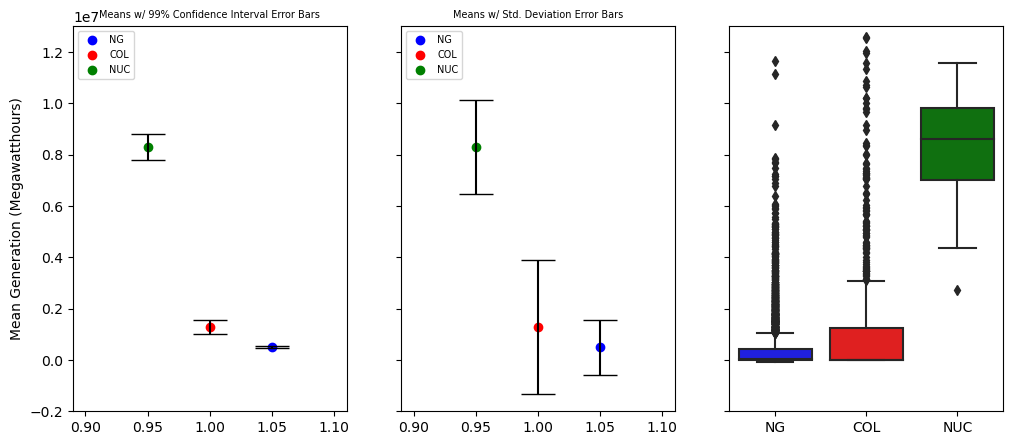

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), sharey=True)

w=0.1

ax[0].bar(1.05,height=mean_name1,yerr=ci99_name1,capsize=12,width=w,alpha=0)
ax[0].scatter(1.05,mean_name1,color='b',label=f'{name1}')
ax[0].bar(1,height=mean_name2,yerr=ci99_name2,capsize=12,width=w,alpha=0)
ax[0].scatter(1,mean_name2,color='r',label=f'{name2}')
ax[0].bar(0.95,height=mean_name3,yerr=ci99_name3,capsize=12,width=w,alpha=0)
ax[0].scatter(0.95,mean_name3,color='g',label=f'{name3}')
ax[0].set_title('Means w/ 99% Confidence Interval Error Bars',fontsize=7)
ax[0].legend(fontsize=7,loc='upper left')
ax[0].set_ylim(-0.2*10**7,1.3*10**7)
ax[0].set_ylabel('Mean Generation (Megawatthours)')

ax[1].bar(1.05,height=mean_name1,yerr=std_name1,capsize=12,width=w,alpha=0)
ax[1].scatter(1.05,mean_name1,color='b',label=f'{name1}')
ax[1].bar(1,height=mean_name2,yerr=std_name2,capsize=12,width=w,alpha=0)
ax[1].scatter(1,mean_name2,color='r',label=f'{name2}')
ax[1].bar(0.95,height=mean_name3,yerr=std_name3,capsize=12,width=w,alpha=0)
ax[1].scatter(0.95,mean_name3,color='g',label=f'{name3}')
ax[1].set_title('Means w/ Std. Deviation Error Bars',fontsize=7)
ax[1].legend(fontsize=7,loc='upper left')
ax[1].set_ylim(-0.2*10**7,1.3*10**7)

df_name1 = df2_extracted[df2_extracted['AER\nFuel Type Code'] == name1]
df_name2 = df2_extracted[df2_extracted['AER\nFuel Type Code'] == name2]
df_name3 = df2_extracted[df2_extracted['AER\nFuel Type Code'] == name3]
combined_df = pd.concat([df_name1, df_name2, df_name3])

customColors = {name1: 'b', name2: 'r', name3: 'g'}

sns.boxplot(data=combined_df,x='AER\nFuel Type Code',y='Net Generation\n(Megawatthours)',palette=customColors,ax=ax[2])
ax[2].set_xlabel('')  # remove x-axis label
ax[2].set_ylabel('')  # remove y-axis label
ax[2].set_ylim(-0.2*10**7,1.3*10**7)

(c) Briefly compare the three plots, and provide a plausible explanation for the differences you observe between the different generation types.

- The standard deviation error bars are much larger than the 99% confidence interval error bars, particularly in the COL and NUC groups. Looking at the boxplots of the data, this makes sense since you can visually see that there appears to be a lot of variation in those two datasets - there are a lot of outliers which would be contributing to the overall high standard deviations!

**HW 9-3**. I am  trying to measure the rate constant for a particular enzyme to determine whether it is equal to the rate of another enzyme, which is $1.4\times 10^4$ s$^{-1}$, within statistical error.  (You may use the `scipy.stats` t-tests).

  a) I make 5 measurements, 1.6, 1.4, 1.3, 1.8, and 1.9 (in $10^{4}$ s$^{-1}$). Can I conclude that the rate constant is different at the $\alpha=0.01$ confidence level?

In [14]:
data_p3 = np.array([1.6,1.4,1.3,1.8,1.9])
mean = np.mean(data_p3)
std = np.std(data_p3)
popRate = 1.4
alpha = 0.01

tstat,pval = stats.ttest_1samp(data_p3,popRate)

if pval<alpha:
    print(f'The p-value for this test is {pval:.3f}. Since this is less than our alpha, {alpha}, we reject the null hypothesis and conclude that the rate constant IS different at the {alpha} confidence level')
else:
    print(f'The p-value for this test is {pval:.3f}. Since this is greater than our alpha, {alpha}, we fail to reject the null hypothesis and conclude that the rate constant IS NOT different at the {alpha} confidence level')

The p-value for this test is 0.154. Since this is greater than our alpha, 0.01, we fail to reject the null hypothesis and conclude that the rate constant IS NOT different at the 0.01 confidence level


b) How many measurements, if the sample had the same mean and sample standard deviation, do I need to make to conclude that the rate constant is different than the original enzyme at the $\alpha=0.01$ confidence level? 

In [15]:
num = 13 # manually increase this until the p value is less than 0.01!
alpha = 0.01

# calculate the test statistic using the equation in class 17 notes
t = (mean-popRate)/(std/np.sqrt(num)) 

# cdf just evaluates the cdf at the input t-value, giving area of left tail
# multiply by 2 since this is a two-tailed test!
p = stats.t.cdf(-1*np.abs(t),num-1)*2

if p<alpha:
    print(f'With {num} measurements, the p-value for this test is {p:.3f}. Since this is less than our alpha, {alpha}, we can conclude that the rate constant is different than the original enzyme at the {alpha} confidence level!')
else:
    print(f'With {num} measurements, the p-value for this test is {p:.3f}. Since this is greater than our alpha, {alpha}, we cannot conclude that the rate constant is different than the original enzyme at the {alpha} confidence level. \n\nWe need more measurements!')

With 13 measurements, the p-value for this test is 0.008. Since this is less than our alpha, 0.01, we can conclude that the rate constant is different than the original enzyme at the 0.01 confidence level!


**HW 9-4**. Now I am interested in analyzing the data above with a new enzyme, and I want to know if it is has a *higher* rate constant than our old enzyme (so I can start using the new one!) The old enzyme had rate constant of $1.4\times 10^4$ s$^{-1}$.

a) I make the same 5 measurements as above. Can I conclude that the rate constant is higher than that of the old enzyme at the $\alpha=0.01$ confidence level?

In [16]:
tstat,pval = stats.ttest_1samp(data_p3,popRate,alternative='greater')

if pval<alpha:
    print(f'The p-value for this test is {pval:.3f}. Since this is less than our alpha, {alpha}, we reject the null hypothesis and conclude that the rate constant IS different at the {alpha} confidence level')
else:
    print(f'The p-value for this test is {pval:.3f}. Since this is greater than our alpha, {alpha}, we fail to reject the null hypothesis and conclude that the rate constant IS NOT different at the {alpha} confidence level')

The p-value for this test is 0.077. Since this is greater than our alpha, 0.01, we fail to reject the null hypothesis and conclude that the rate constant IS NOT different at the 0.01 confidence level


b) How many measurements, with the same mean and sample standard deviation, do I need to make to conclude that the rate constant is higher than $1.4 \times 10^{4}$ $s^{-1}$ at the $\alpha=0.01$ confidence level?

In [17]:
num = 10 # manually increase this until the p value is less than 0.01!
alpha = 0.01

# calculate the test statistic using the equation in class 17 notes
t = (mean-popRate)/(std/np.sqrt(num)) 

# cdf just evaluates the cdf at the input t-value, giving area of left tail
# do NOT multiply by 2 since this is a one-tailed test!
p = stats.t.cdf(-1*np.abs(t),num-1)

if p<alpha:
    print(f'With {num} measurements, the p-value for this test is {p:.3f}. Since this is less than our alpha, {alpha}, we can conclude that the rate constant is different than the original enzyme at the {alpha} confidence level!')
else:
    print(f'With {num} measurements, the p-value for this test is {p:.3f}. Since this is greater than our alpha, {alpha}, we cannot conclude that the rate constant is different than the original enzyme at the {alpha} confidence level. \n\nWe need more measurements!')

With 10 measurements, the p-value for this test is 0.011. Since this is greater than our alpha, 0.01, we cannot conclude that the rate constant is different than the original enzyme at the 0.01 confidence level. 

We need more measurements!


**HW 9-5**. I was a bit sloppy with that last test. I realized that I didn't have very precise data on the first enzyme!  I go back and look at the previous student's lab notebook and find that the rate of the old enzyme was determined as $1.4 \times 10^{4}$ $s^{-1}$ using 5 measurements, with a standard deviation of 0.3. 

a) Can I conclude that the rate constant for the new enzyme is higher than the old one at the $\alpha=0.01$ confidence level, using just the five samples?

- In class, we discussed a two sample t-test using two different datasets. With that, we used the [scipy.stats.ttest_ind()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function.
- But here, we don't have the other dataset, just it's statistics so we should use [scipy.stats.ttest_ind_from_stats()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html) instead!

In [18]:
oldMean = 1.4
oldStd = 0.3
oldNum = 5

tstat,pval = stats.ttest_ind_from_stats(mean1=mean, std1=std, nobs1=num, mean2=oldMean, std2=oldStd, nobs2=oldNum)

if pval<alpha:
    print(f'The p-value for this test is {pval:.3f}. Since this is less than our alpha, {alpha}, we reject the null hypothesis and conclude that the rate constant IS different at the {alpha} confidence level')
else:
    print(f'The p-value for this test is {pval:.3f}. Since this is greater than our alpha, {alpha}, we fail to reject the null hypothesis and conclude that the rate constant IS NOT different at the {alpha} confidence level')

The p-value for this test is 0.172. Since this is greater than our alpha, 0.01, we fail to reject the null hypothesis and conclude that the rate constant IS NOT different at the 0.01 confidence level


b) How many measurements would I have needed with my new enzyme (assuming the sample standard deviation remains the same) to conclude that the rate constant of the new enzyme is higher at the $\alpha=0.01$ confidence level?

In [19]:
# assume that mean and std (the mean and standard deviation of the new data measurements) stays the same, even though the number of measurements changes!
num=100000

tstat,pval = stats.ttest_ind_from_stats(mean1=mean, std1=std, nobs1=num, mean2=oldMean, std2=oldStd, nobs2=oldNum)

if pval<alpha:
    print(f'With {num} measurements, the p-value for this test is {pval:.3f}. Since this is less than our alpha, {alpha}, we can conclude that the rate constant is different than the original enzyme at the {alpha} confidence level!')
else:
    print(f'With {num} measurements, the p-value for this test is {pval:.3f}. Since this is greater than our alpha, {alpha}, we cannot conclude that the rate constant is different than the original enzyme at the {alpha} confidence level. \n\nWe need more measurements!')

With 100000 measurements, the p-value for this test is 0.050. Since this is greater than our alpha, 0.01, we cannot conclude that the rate constant is different than the original enzyme at the 0.01 confidence level. 

We need more measurements!


- No matter how high the number of measurements goes up to, the p-value won't go below 0.05. For these conditions, we can't ever make enough measurements to be able to conclude that the rate constant of the new enzyme is higher at the alpha = 0.01 confidence level.

c) How many more number of measurements I should make, *If I could allocate these measurements of both the old enzyme and of the new enzyme*, assuming the standard deviations and means stay the same with each measurement, to conclude that the rate constant of the new enzyme is larger? Is the assumption that the standard deviations stay the same reasonable?

In [20]:
# assume that mean and std (the mean and standard deviation of the new data measurements) stays the same, even though the number of measurements changes!

# assume that nobs1 and nobs2 are both = num !
newMeasurements=26

tstat,pval = stats.ttest_ind_from_stats(mean1=oldMean, std1=oldStd, nobs1=newMeasurements, mean2=mean, std2=std, nobs2=newMeasurements)

if pval<alpha:
    print(f'With {newMeasurements} measurements, the p-value for this test is {pval:.3f}. Since this is less than our alpha, {alpha}, we can conclude that the rate constant is different than the original enzyme at the {alpha} confidence level!')
else:
    print(f'With {newMeasurements} measurements, the p-value for this test is {pval:.3f}. Since this is greater than our alpha, {alpha}, we cannot conclude that the rate constant is different than the original enzyme at the {alpha} confidence level. \n\nWe need more measurements!')

With 26 measurements, the p-value for this test is 0.009. Since this is less than our alpha, 0.01, we can conclude that the rate constant is different than the original enzyme at the 0.01 confidence level!


d) It turns out that after I carry out new measurements of the enzyme described above, I end up with a p-value of 0.06. If I can show this new enzyme is statistically better than the old one, the paper will likely get in Science.  What is the minimum number of additional experiments I should run in order to get the the p-value low enough? 

- I used ChatGPT on this problem since I was pretty confused on how the p-value factored into the calculations.
- ChatGPT made it seem like the p-value wouldn't get factored into a power analysis to determine the number of additional experiments needed
- I'm not sure if this is correct, but I decided to take the approach of changing the number of measurements for the new data (assuming number of old measurements was 5 again) until the p-value for my test was less than 0.06?
- I apologize if this isn't what we were supposed to do, I was just a bit confused on wording!

In [21]:
data_p3 = np.array([1.6,1.4,1.3,1.8,1.9])
mean = np.mean(data_p3)
std = np.std(data_p3)
alpha = 0.01

oldMean = 1.4
oldStd = 0.3
oldNum = 5

num=119

tstat,pval = stats.ttest_ind_from_stats(mean1=mean, std1=std, nobs1=num, mean2=oldMean, std2=oldStd, nobs2=oldNum)

if pval<0.06:
    print(f'With {num} measurements, the p-value for this test is {pval:.3f}. Since this is less than our 0.06, we can conclude that the rate constant is different than the original enzyme at the {alpha} confidence level!')
else:
    print(f'With {num} measurements, the p-value for this test is {pval:.3f}. Since this is greater than 0.06, we cannot conclude that the rate constant is different than the original enzyme at the {alpha} confidence level. \n\nWe need more measurements!')

With 119 measurements, the p-value for this test is 0.060. Since this is less than our 0.06, we can conclude that the rate constant is different than the original enzyme at the 0.01 confidence level!


**HW 9-6**. I perform one experiment, generating one set of data, then peform another experiment on the same samples. We want to determine if the effect on the samples is statistically signficant. We'll make up some data so we can see what's going on. We'll say the treatment just increases the value by a little bit, with some random noise.

(array([4., 1., 2., 2., 0., 0., 0., 0., 0., 1.]),
 array([1.09201064, 1.50692553, 1.92184043, 2.33675532, 2.75167022,
        3.16658511, 3.5815    , 3.9964149 , 4.41132979, 4.82624469,
        5.24115958]),
 <BarContainer object of 10 artists>)

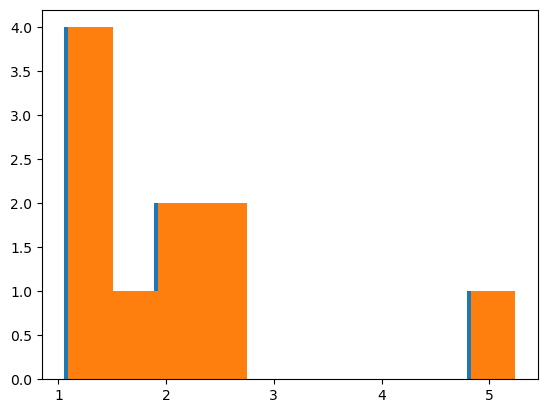

In [22]:
sample_size = 10 # create samples
b = 1.5
samp1 = scipy.stats.pareto.rvs(b,size=sample_size)
samp2 = samp1 + 0.03 + 0.01*np.random.normal(size=sample_size)
plt.hist(samp1)
plt.hist(samp2)

Run the Mann-Whitney U / Wilcoxon rank-sum test, the Wilcoxon signed-rank test, and the standard t-test for paired samples. Explain what you find in the Markdown cell below, and which test is the best one to use to determine if there is an effect.

In [23]:
# Mann-Whitney U (Wilcoxon rank-sum) test
u_tstat, pval_mannWhitney = scipy.stats.mannwhitneyu(samp1, samp2)

# Wilcoxon signed-rank test
w_tstat, pval_wilcoxon = scipy.stats.wilcoxon(samp1, samp2)

# Paired t-test
t_tstat, pval_paired = scipy.stats.ttest_rel(samp1, samp2)

print(f"Mann-Whitney U (Wilcoxon rank-sum) test p-value: {pval_mannWhitney:.4f}")
print(f"Wilcoxon signed-rank test p-value: {pval_wilcoxon:.4f}")
print(f"Standard t-test for paired samples p-value: {pval_paired:.4e}")

Mann-Whitney U (Wilcoxon rank-sum) test p-value: 0.5708
Wilcoxon signed-rank test p-value: 0.0020
Standard t-test for paired samples p-value: 3.7925e-07


- Found that the p-values varied greatly depending on the test used!
- The [Mann Whiteney U Test](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/bs704_nonparametric4.html) is used to test if two data sets are coming from the same population. In other words, it is testing if the two data sets have the same or different distributions. Here, the p-value is greater than a threshold alpha of 0.01, so we can't claim that the distributions of the two datasets would be significantly different (i.e., we can't say that they come from different distributions).
- The [Wilcoxon Signed-Rank Test](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/BS704_Nonparametric6.html) tests matched / paired data. It takes into account the magnitude of observed differences. Here, the p-value is less than a threshold alpha of 0.01, which suggests that there would be a significant difference between these two paired datasets.
- The [Standard T-Test for Paired Samples](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/sas/sas4-onesamplettest/SAS4-OneSampleTtest7.html) compares the means of two paired datsets to determine whether or not there is a statistically significant difference between them. Here, the p-value is less than a threshold alpha of 0.01, which suggests that there would be a significant difference between these two paired datasets. This test assumes that the differences are normally distributed ([Stack Exchange](https://stats.stackexchange.com/questions/495848/paired-t-test-check-normality-with-residuals-or-paired-differences-or-both#:~:text=A%20paired%20t%2Dtest%20is,differences%20minus%20the%20mean%20difference.))!

- I would guess that the Wilcoxon Signed-Rank Test is best to determine if there is an effect because it doesn't have the assumptions of the standard t-test and provides good evidence that the datasets are different. 

#### HW 9-7. The Bejamini-Hochberg procedure

The Bejamini-Hotchberg procedure allows us to set a p-value for set of simultaneous experiments with a controlled FDR (false discovery rate) This homework problem is the same as the one presented in class, but I changed some of the numbers.

We carry out an experiment where we measure 1000 bacterial genes, treat the bacteria, and measure the log change in expression (data generated below). We repeat the experiment  $N$  times. We anticipate an effect change of 0.5. We want a false discovery rate of no more than 10% ($Q=0.10$). What threshold p-value should we set?

<function matplotlib.pyplot.show(close=None, block=None)>

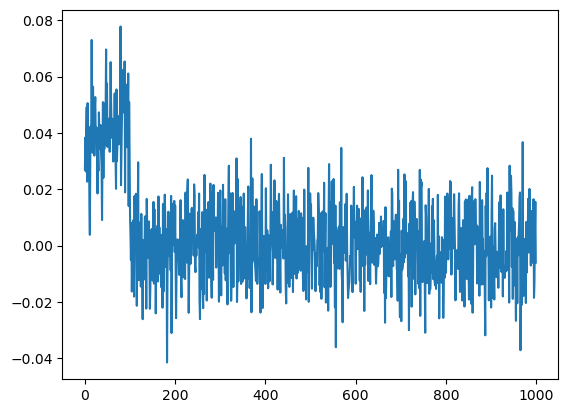

In [24]:
nvariables = 1000 # number of variables are are testing during our experiment.
# nvariables=100000 - changed this in the last part to see how FDR changes
Q = 0.1 # desired false discovery rate
nrepeats = 65 # is this a good for N? How could we know?
data = np.zeros([nvariables,nrepeats])
normsample = scipy.stats.norm(loc=0,scale=0.1)
for i in range(nvariables):
    data[i,:] = normsample.rvs(nrepeats)
    
# Now let's say that the first 100 are actually the ones that have an 
# increase in expression.  Let's see if we can figure that out.
data[0:100,:]= data[0:100,:] + 0.04
plt.plot(np.mean(data,axis=1))
plt.show

For each of the `nvariable` experiments, we want to know if it is statistically different from zero. What test should we run on each experiment? Try on the first experiment (`data[0,:]`)

In [25]:
# run a 1 sample ttest on each experiment!
tstat, pval = scipy.stats.ttest_1samp(data[0, :], popmean=0)

Now calculate the p-value of each of the `nvariable` experiments, and put them in a list.

In [26]:
# initialize a list of p-values to store the p-value of each of the nvariable experiments in
pval_list = []

# for each of the nvariable experiments, calculate the tstat + pval and store the pval in the pval list
for i in range(nvariables):
    tstat, pval = scipy.stats.ttest_1samp(data[i, :], popmean=0)
    pval_list.append(pval)

Now, sort the `nvariables` p-values in ascending order.

In [27]:
# ChatGPT used here - I was having trouble with the list sorting...
# sort the pvals in ascending order!
sorted_pval = [pval_list[i] for i in np.argsort(pval_list)]

Each of the `nvariable` p-values has a rank $m = (1,2,3,\ldots)$; the smallest has rank 1, the second smallest has rank 2, the last has rank `nvariable`. Calculate the critical value for each p-value, defined as $\frac{mQ}{nvariables}$, where $Q$ is the desired false discovery rate (FDR).

In [28]:
# intialize a list of critical values for each p-value
critval = []

# ChatGPT was used here to help me with writing this for loop : )
# loop through each sorted pval and calculate cval
for m, pval in enumerate(sorted_pval, start=1):
    cval = (m * Q) / nvariables
    critval.append(cval)

Now compare the set of critical values to the corresponding set of p-values. Now, which is the largest p-value that is smaller than its corresponding critical value? THAT is the corrected p-value.

In [29]:
corr_pval = 0 # initialize the corrected p-value

for pval, cval in zip(sorted_pval, critval): # compare the set of cvals to the corresponding set of pvals
    if pval <= cval: 
        # find the largest pval which is smaller than its corresponding cval
        # since pvals are sorted in ascending order, just replace corr_pval as we iterate thru the list
        # since the new corr_pval will be the largest pval smaller than its corresponding cval!
        corr_pval = pval
    else:
        break

print(f'The corrected p-value is {corr_pval:.5f}')

The corrected p-value is 0.00682


What percentage of the experiments with p-value less than the corrected p-value are in the first 100 experiments (the ones we set to be a bit higher)?

In [30]:
firstHundred = 100
count = 0

for i in range(firstHundred):
    if sorted_pval[i] <= corr_pval:
        count +=1

print(f'{count/firstHundred*100}% of experiments with p-values less than the corrected p-value are in the first 100 experiments.')

79.0% of experiments with p-values less than the corrected p-value are in the first 100 experiments.


What percentage of the experiments with p-value less than than the corrected p-value are in the last 900 experiments?

In [31]:
print(f'{100-count/firstHundred*100}% of experiments with p-values less than the corrected p-value are in the last 900 experiments.')

21.0% of experiments with p-values less than the corrected p-value are in the last 900 experiments.


What is the false discovery rate? How close is it to the target $Q$? Try the whole process a few times with different experiments to see how much the true false discovery rate changes.

- I think the false discover rate would just the percentage of experiments with p-values less than the corrected p-value in the first 100 experiments since that would be the false positive rate. For the original problem parameters, this would be 60%.
- Change nvariables to 10000 makes the false discovery rate 10.0%.
- Further increasing nvariables to 100000 decreases the FDR even more to 2.0%